Question no 1:


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [5]:
dataframe=pd.read_csv("movies (1).csv")

In [6]:
new_dataframe=dataframe["STARS"].tolist()

In [7]:
director_name=[]
actors_name=[]
for i in range(len(new_dataframe)):
    if "|" in new_dataframe[i]:
        ending_index=new_dataframe[i].index("|")
        director=new_dataframe[i][:ending_index].strip()
        ei=director.find(":")
        director=director[ei+1:]
        director_name.append(director.strip())
    else:
        director_name.append("None")
        
        
        

In [8]:
for i in range(len(new_dataframe)):
    ending_index=new_dataframe[i].find("|")
    actor=new_dataframe[i][ending_index+1:].strip()
    ei=actor.find(":")
    actor=actor[ei+1:]
    actors_name.append(actor.strip())
    

In [9]:
dataframe['Director']=director_name
dataframe['Actors']=actors_name    

In [10]:
dataframe=dataframe.drop(columns=["STARS"])

dataframe

In [11]:
ns = set()
for i in range(len(dataframe)):
    names = dataframe['Actors'].iloc[i]
    for name in names.split(","):
        ns.add(name.strip())


In [12]:
actor_ratings = {}
for i in range(len(dataframe)):
    actors = dataframe['Actors'].iloc[i].split(",")
    rating = dataframe['RATING'].iloc[i]
    if rating>0:
        try:
            numeric_rating = float(rating)  
            for actor in actors:
                actor = actor.strip()
                if actor not in actor_ratings:
                    actor_ratings[actor] = []
                actor_ratings[actor].append(numeric_rating)
        except (ValueError, TypeError):
            pass  

average_ratings = {
    actor: sum(ratings) / len(ratings)
    for actor, ratings in actor_ratings.items()
    if ratings 
}

# Sort actors by average rating in descending order
sorted_actors = sorted(average_ratings.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract data and first names of actors with valid ratings
data = []
actors = []
for actor, avg_rating in sorted_actors:
    #if avg_rating > 0:  # Ensure the average rating is positive
    print(f"Actor: {actor}, Average Rating: {avg_rating:.2f}")
    data.append(avg_rating)
    actor_first_name = actor.split(" ")[0]
    actors.append(actor_first_name)


Actor: Deneen Fendig, Average Rating: 9.70
Actor: Lisa Kreuzer, Average Rating: 9.70
Actor: Sebastian Rudolph, Average Rating: 9.65
Actor: Mako, Average Rating: 9.60
Actor: Gary Anthony Sturgis, Average Rating: 9.60
Actor: Arnd Klawitter, Average Rating: 9.60
Actor: Paul Lux, Average Rating: 9.60
Actor: Helena Pieske, Average Rating: 9.50
Actor: Sandra Borgmann, Average Rating: 9.50
Actor: Carlotta von Falkenhayn, Average Rating: 9.45


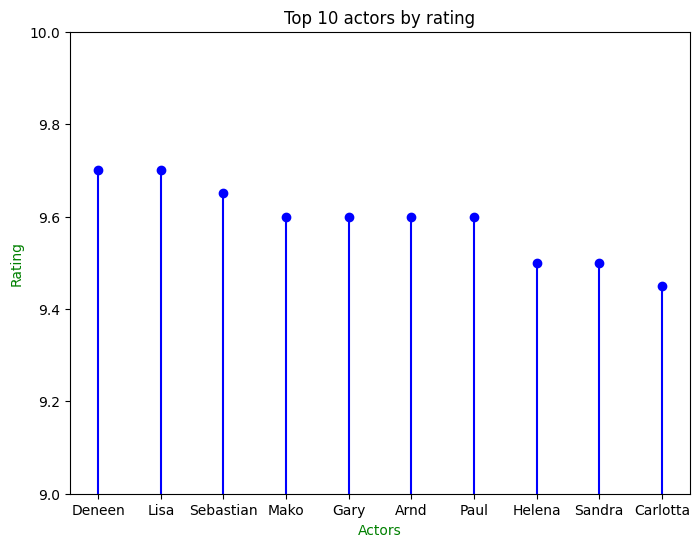

In [13]:
plt.figure(figsize=(8,6))
plt.stem(actors,data,linefmt='blue',markerfmt='ob',label="Top 10 actors by rating")
plt.title("Top 10 actors by rating")
plt.xlabel("Actors",color="green")
plt.ylabel("Rating",color='green')
plt.ylim(9,10)
plt.show()

Question no 2:


Import all 5 CSV files as Pandas DataFrames, print their schemas,
then perform data cleaning if found to be necessary.

In [14]:
albums_data=pd.read_csv("spotify-albums_data_2023.csv")
artist_data=pd.read_csv("spotify_artist_data_2023.csv")
spotify_data=pd.read_csv("spotify_data_12_20_2023.csv")
tracks_data=pd.read_csv("spotify_tracks_data_2023.csv")
features_data=pd.read_csv("spotify_features_data_2023.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_19656\2503005454.py:3: DtypeWarning: Columns (25,26,44) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify_data=pd.read_csv("spotify_data_12_20_2023.csv")


In [15]:
print("Schemas for the albums_data")
albums_data.info()
albums_data.describe()
print("Schemas for the artist_data")
artist_data.info()
artist_data.describe()
print("Schemas for the spotify data")
spotify_data.info()
spotify_data.describe()
print("Schemas for the tracks data")
tracks_data.info()
tracks_data.head()
print("Schmeas for the features data")
features_data.info()
features_data.describe()

Schemas for the albums_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438973 entries, 0 to 438972
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_name        438968 non-null  object 
 1   track_id          438973 non-null  object 
 2   track_number      438973 non-null  int64  
 3   duration_ms       438973 non-null  int64  
 4   album_type        438973 non-null  object 
 5   artists           0 non-null       float64
 6   total_tracks      438973 non-null  int64  
 7   album_name        438972 non-null  object 
 8   release_date      438950 non-null  object 
 9   label             438921 non-null  object 
 10  album_popularity  438973 non-null  int64  
 11  album_id          438973 non-null  object 
 12  artist_id         438973 non-null  object 
 13  artist_0          438970 non-null  object 
 14  artist_1          100485 non-null  object 
 15  artist_2          43650 non-null   objec

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,438112.000000,438112.000000,438112.000000,438112.000000,438112.000000,438112.000000,438112.000000,438112.000000,438112.000000,438112.00000,438112.000000,4.381120e+05,438112.000000
mean,0.573555,0.528345,5.237617,-11.155534,0.638287,0.112228,0.384170,0.265504,0.194991,0.45724,118.729114,2.163335e+05,3.876831
std,0.190432,0.264231,3.579329,6.472758,0.480497,0.156232,0.359647,0.379555,0.172597,0.26700,30.376446,1.188371e+05,0.515805
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.719000e+03,0.000000
25%,0.455000,0.323000,2.000000,-13.916000,0.000000,0.036300,0.037500,0.000000,0.097000,0.23300,95.028000,1.610018e+05,4.000000
50%,0.600000,0.544000,5.000000,-9.467000,1.000000,0.049600,0.263000,0.000805,0.123000,0.44500,119.820000,2.054530e+05,4.000000
75%,0.715000,0.741000,8.000000,-6.645000,1.000000,0.103000,0.739000,0.701000,0.233000,0.66900,137.894250,2.520000e+05,4.000000
max,0.999000,1.000000,11.000000,3.744000,1.000000,0.970000,0.996000,1.000000,1.000000,1.00000,249.428000,5.407669e+06,5.000000


In [16]:
for i in range(3,12):
    albums_data=albums_data.drop(columns=[f"artist_{i}"])
albums_data=albums_data.drop(columns=['artists'])
albums_data = albums_data.dropna(subset=["track_name"])
for i in range(3):
    albums_data[f'artist_{i}'].fillna("Unknown",inplace=True)
albums_data['release_date']=pd.to_datetime(albums_data['release_date'])
albums_data['release_date'].fillna("unkown",inplace=True)
albums_data['label'].fillna("unknown",inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19656\2351988745.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  albums_data[f'artist_{i}'].fillna("Unknown",inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_19656\2351988745.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [23]:
albums_data.head()

,track_name,track_id,track_number,duration_ms,album_type,total_tracks,album_name,release_date,label,album_popularity,album_id,artist_id,artist_0,artist_1,artist_2,duration_sec
0,Amazing Grace,6mN8nzCXWUeT5LWEcG1Utx,5,555521,album,9,Deep Peace Experience,2015-06-09 00:00:00+00:00,Mountain Music Inc,6,3VoHMFQzFr9v163HXRvfo2,002nyxOMwdc9EgNEo7ETcF,Radiancematrix,Unknown,Unknown,555.521
1,Silent Night,58sgjtx3FOnBBEOd3BQE6C,8,535041,album,9,Deep Peace Experience,2015-06-09 00:00:00+00:00,Mountain Music Inc,6,3VoHMFQzFr9v163HXRvfo2,002nyxOMwdc9EgNEo7ETcF,Radiancematrix,Unknown,Unknown,535.041
2,Ancient Canyons,45tQJhm0WSk5VWMZK3FsLK,1,545855,album,9,Deep Peace Experience,2015-06-09 00:00:00+00:00,Mountain Music Inc,6,3VoHMFQzFr9v163HXRvfo2,002nyxOMwdc9EgNEo7ETcF,Radiancematrix,Unknown,Unknown,545.855
3,Pacha Mama Medicina,3VFD7QqkJSg0OR6yBwKl7A,6,305241,album,9,Deep Peace Experience,2015-06-09 00:00:00+00:00,Mountain Music Inc,6,3VoHMFQzFr9v163HXRvfo2,002nyxOMwdc9EgNEo7ETcF,Radiancematrix,Unknown,Unknown,305.241
4,Palace Of Light,7LwJV5BEIC9BQnzvaBSyCc,7,351060,album,9,Deep Peace Experience,2015-06-09 00:00:00+00:00,Mountain Music Inc,6,3VoHMFQzFr9v163HXRvfo2,002nyxOMwdc9EgNEo7ETcF,Radiancematrix,Unknown,Unknown,351.060


In [17]:
for i in range(2,7):
    artist_data=artist_data.drop(columns=[f"genre_{i}"])
for i in range(2):
    artist_data[f"genre_{i}"].fillna("Unknown",inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19656\1621603992.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  artist_data[f"genre_{i}"].fillna("Unknown",inplace=True)


In [18]:
spotify_data['release_date'] = pd.to_datetime(spotify_data['release_date'], errors='coerce')
spotify_data['release_date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

# Fill missing categorical values
spotify_data['label'].fillna('Unknown', inplace=True)
for i in range(5):
    spotify_data[f'artist_{i}'].fillna('Unknown', inplace=True)


# Drop columns with too many missing values

C:\Users\DELL\AppData\Local\Temp\ipykernel_19656\244613024.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spotify_data['release_date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_19656\244613024.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1900-01-01 00:00:00' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  spotify_data['release_dat

2. In spotify-artist-data_2023.csv :
Count the number of distinct artists.
Count the number of distinct artist genres.
Display a bar graph showing follower count of top 10 artists with the most followers.

In [25]:
artist_data.head(20)

,id,name,artist_popularity,artist_genres,followers,genre_0,genre_1
0,6GkSLJj5CGLIckLIb8J4LR,Late Night Fights,0,['minneapolis punk'],184,minneapolis punk,Unknown
1,1N0VwQy5PRJymrRvlRzDIj,Sub Par All Star,0,['antiviral pop'],491,antiviral pop,Unknown
2,4Ch4BIKKwMJsiu1oVLDwpX,Nirvana Meditation 8D,0,['8d'],56,8d,Unknown
3,5h2iINTOvhghVcpIzrztPP,Red Hot Rebellion,0,['action rock'],394,action rock,Unknown
4,7dE2MLL2SaI6MujpU5HFVi,Nirvana Tribute Band,0,['tribute'],230,tribute,Unknown
5,2cdjmWomWpKyQ0Hqge3dVc,Wyli P,0,['memphis hip hop'],7479,memphis hip hop,Unknown
6,5g1ztx52qgchXwiRZYnxT4,Caul,1,['dark ambient'],688,dark ambient,Unknown
7,3NjmnKYEuN92YZiWVsksy7,Chicago Blues All Stars,1,['chicago blues'],730,chicago blues,Unknown
8,3hqLYpiTCdvz5lG3YHvi4v,Lew Lewis & The Twilight Trio,1,"['neo-rockabilly', 'uk rockabilly']",500,neo-rockabilly,uk rockabilly
9,06hu6DFeD2bfdBAts05Vjh,Lower Life Forms,1,['deep east coast hip hop'],169,deep east coast hip hop,Unknown


In [19]:
artists=set()
for name in artist_data['name']:
    artists.add(name)
genres1=set()
for name in artist_data['genre_0']:
    genres1.add(name)
genres2=set()
for name in artist_data['genre_1']:
    genres2.add(name)
genre=set()
genre=genres1.union(genres2)
print("Number of the distint artist:",len(artists))
print("Number of the distinct genres:",len(genre))

Number of the distint artist: 36196
Number of the distinct genres: 3721


In [28]:
a=artist_data["name"].count()
a

np.int64(37012)

In [24]:
artists

['Ed Sheeran',
 'Taylor Swift',
 'Ariana Grande',
 'Billie Eilish',
 'Drake',
 'Eminem',
 'Bad Bunny',
 'The Weeknd',
 'Justin Bieber',
 'BTS']

In [20]:
artist_followers = {}

for i in range(len(artist_data)):
    artist = artist_data['name'].iloc[i]
    followers = artist_data['followers'].iloc[i]
    
    try:
        numeric_followers = float(followers)
        
        if artist not in artist_followers:
            artist_followers[artist] = 0
        artist_followers[artist] += numeric_followers
    except (ValueError, TypeError):
        pass

sorted_followers = sorted(artist_followers.items(), key=lambda x: x[1], reverse=True)[:10]

data = []
artists = []
for artist, total_followers in sorted_followers:
    print(f"Artist: {artist}, Followers: {total_followers}")
    data.append(total_followers)
    artists.append(artist)


Artist: Ed Sheeran, Followers: 115998928.0
Artist: Taylor Swift, Followers: 95859165.0
Artist: Ariana Grande, Followers: 95710972.0
Artist: Billie Eilish, Followers: 89996504.0
Artist: Drake, Followers: 83312642.0
Artist: Eminem, Followers: 79891173.0
Artist: Bad Bunny, Followers: 77931484.0
Artist: The Weeknd, Followers: 75945958.0
Artist: Justin Bieber, Followers: 75112165.0
Artist: BTS, Followers: 71741499.0


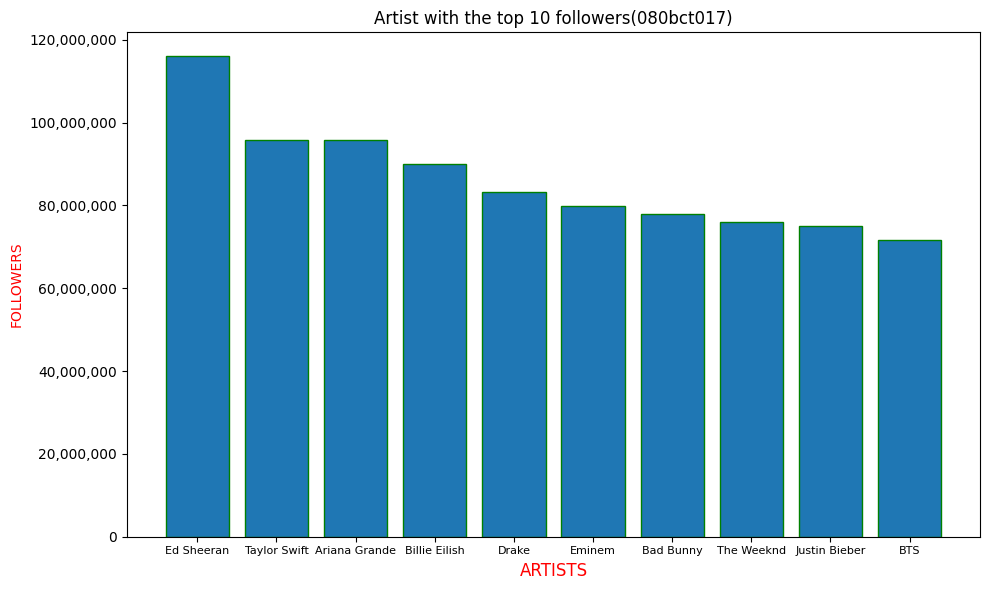

In [21]:
plt.figure(figsize=(10,6))
plt.bar(artists,data,edgecolor='green')
plt.title("Artist with the top 10 followers(080bct017)")
plt.xlabel("ARTISTS",color='red',fontsize=12)
plt.ylabel("FOLLOWERS",color='red')
plt.xticks(fontsize=8)
def format_full_numbers(x, pos):
    return f'{int(x):,}'  # Format with commas
plt.gca().yaxis.set_major_formatter(formatter=FuncFormatter(format_full_numbers))
plt.tight_layout()
plt.show()


3. In the spotify_features_data_2023.csv :
Calculate basic statistics of each feature (quartiles, min, max, variance etc.)
Plot the correlation between each feature using a heatmap.
Can any conclusion can be drawn from the heatmap?